<a href="https://colab.research.google.com/github/gundall98/AI-X-Machine-Learning/blob/master/AI%2BX_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2%EB%B2%88_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 분석을 통한 KOSPI 가격 예측
## 데이터 출처: 네이버 금융
### 저자: 2017056617 파이낸스경영학과 박건 

* 인터넷 속도에 따라 런닝 타임이 변동될 수 있음
* 해당 머신러닝을 이용한 투자의 책임은 당사자에게 있음을 알림

In [8]:
from bs4 import BeautifulSoup
import urllib.request as req
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
 


Fdata = []
Inddata = []
Insdata = []
Ddata = []
KOSPIs=[]
dates = []
KOSPIrate = []
Yesterdays = []

# 매매동향 기준 페이지당 10개의 데이터
# 코스피 기준 페이지당 6개의 데이터
num = input("확인할 데이터의 수를 입력하시오: \n")


# -----------------------------------------------#
#              투자자별 매매동향                 #
# -----------------------------------------------#
pages = int(num)//10
left = int(num)%10

for i in range(1,pages+1):
  url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=2020060404&sosok=&page="+str(i)


  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')

  for j in tr:
    date = j.find('td',{'class':'date2'})
    if date != None:
      date= j.find_all('td')[:4][0].text
      Foreign = j.find_all('td')[:4][2].text.replace(",","")
      Individual = j.find_all('td')[:4][1].text.replace(",","")
      Institution = j.find_all('td')[:4][3].text.replace(",","")
      Ddata.insert(0,date)
      Fdata.insert(0,float(Foreign))
      Inddata.insert(0,float(Individual))
      Insdata.insert(0,float(Institution))

# 잔여 데이터 불러오기 (입력한 요구 데이터 수량 % 크롤링한 페이지 수)
if left != 0:
  url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=2020060404&sosok=&page="+str(pages+1)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')
  count = 0

  for j in tr:
    if count < left:
      date = j.find('td',{'class':'date2'})
      if date != None:

        date= j.find_all('td')[:4][0].text
        Foreign = j.find_all('td')[:4][2].text.replace(",","")
        Individual = j.find_all('td')[:4][1].text.replace(",","")
        Institution = j.find_all('td')[:4][3].text.replace(",","")
        Ddata.insert(0,date)
        Fdata.insert(0,float(Foreign))
        Inddata.insert(0,float(Individual))
        Insdata.insert(0,float(Institution))
        count += 1

# -----------------------------------------------#
#              KOSPI 종가 데이터                 #
# -----------------------------------------------#
pages = int(num)//6
left = int(num)%6

for i in range(1,pages+1):
  url = "https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="+str(i)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')

  for j in tr:
    date = j.find('td',{'class':'date'})
    if date != None:
      date= j.find_all('td')[:4][0].text
      if date not in dates:
        
        dates.append(date)

        KOSPI = j.find_all('td')[:4][1].text.replace(",","")
        KOSPIrates = j.find_all('td')[:4][3].text.replace("\t","").replace("\n","").replace(",","")
        
        KOSPIs.insert(0,float(KOSPI))
        KOSPIrate.insert(0,KOSPIrates)

        if KOSPIrates[0] == "+":
          Yes = j.find_all('td')[:4][2].text.replace("\t","").replace("\n","")
        elif KOSPIrates[0] == "-":
          Yes = str("-")+j.find_all('td')[:4][2].text.replace("\t","").replace("\n","")
        
        Yesterdays.insert(0,float(Yes))
        

# 잔여 데이터 불러오기 (입력한 요구 데이터 수량 % 크롤링한 페이지 수)
if left != 0:
  url = "https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="+str(pages+1)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')
  count = 0

  for j in tr:
    if count < left:
      date = j.find('td',{'class':'date'})
      if date != None:
        date= j.find_all('td')[:4][0].text
        if date not in dates:
          
          dates.append(date)

          KOSPI = j.find_all('td')[:4][1].text.replace(",","")
          KOSPIrates = j.find_all('td')[:4][3].text.replace("\t","").replace("\n","").replace(",","")
        
          KOSPIs.insert(0,float(KOSPI))
          KOSPIrate.insert(0,KOSPIrates)
          if KOSPIrates[0] == "+":
            Yes = j.find_all('td')[:4][2].text.replace("\t","").replace("\n","")
          elif KOSPIrates[0] == "-":
            Yes = str("-")+j.find_all('td')[:4][2].text.replace("\t","").replace("\n","")
          Yesterdays.insert(0,float(Yes))
          count += 1
    
# -----------------------------------------------#
#           pandas 이용 데이터 정리              #
# -----------------------------------------------#
table = pd.DataFrame(index = Ddata)
table["개인투자자 (억원)"] = Inddata
table["외국인 (억원)"] = Fdata
table["기관 (억원)"] = Insdata
table["KOSPI (원)"] = KOSPIs
table["전일대비 (원)"] = Yesterdays
table["sum"] = table["개인투자자 (억원)"] + table["외국인 (억원)"]+table["기관 (억원)"] 
table

확인할 데이터의 수를 입력하시오: 
1000


,개인투자자 (억원),외국인 (억원),기관 (억원),KOSPI (원),전일대비 (원),sum
16.03.17,-2685.0,7364.0,-1455.0,1987.99,13.09,3224.0
16.03.18,297.0,2783.0,-3429.0,1992.12,4.13,-349.0
16.03.21,1035.0,1353.0,-3130.0,1989.76,-2.36,-742.0
16.03.22,-1151.0,1360.0,-884.0,1996.81,7.05,-675.0
16.03.23,-436.0,115.0,-451.0,1995.12,-1.69,-772.0
...,...,...,...,...,...,...
20.04.06,-8430.0,-2019.0,10361.0,1791.88,66.44,-88.0
20.04.07,1492.0,-1951.0,329.0,1823.60,31.72,-130.0
20.04.08,4520.0,-1345.0,-2820.0,1807.14,-16.46,355.0
20.04.09,2941.0,-1783.0,-1296.0,1836.21,29.07,-138.0


# Sklearn을 사용한 회귀 분석
## matplotlib을 통해 회귀 모형 시각화

전체 매매동향과 전일대비의 상관관계:
[[1.         0.07660815]
 [0.07660815 1.        ]]

개인 매매동향과 전일대비의 상관관계:
[[ 1.         -0.59583386]
 [-0.59583386  1.        ]]

외국인 매매동향과 전일대비의 상관관계:
[[1.         0.47445801]
 [0.47445801 1.        ]]

기관 매매동향과 전일대비의 상관관계:
[[1.         0.15672247]
 [0.15672247 1.        ]]

---------------------------------------------------
Quadratic Square Root Value Of Error: 19.329351902221422
---------------------------------------------------


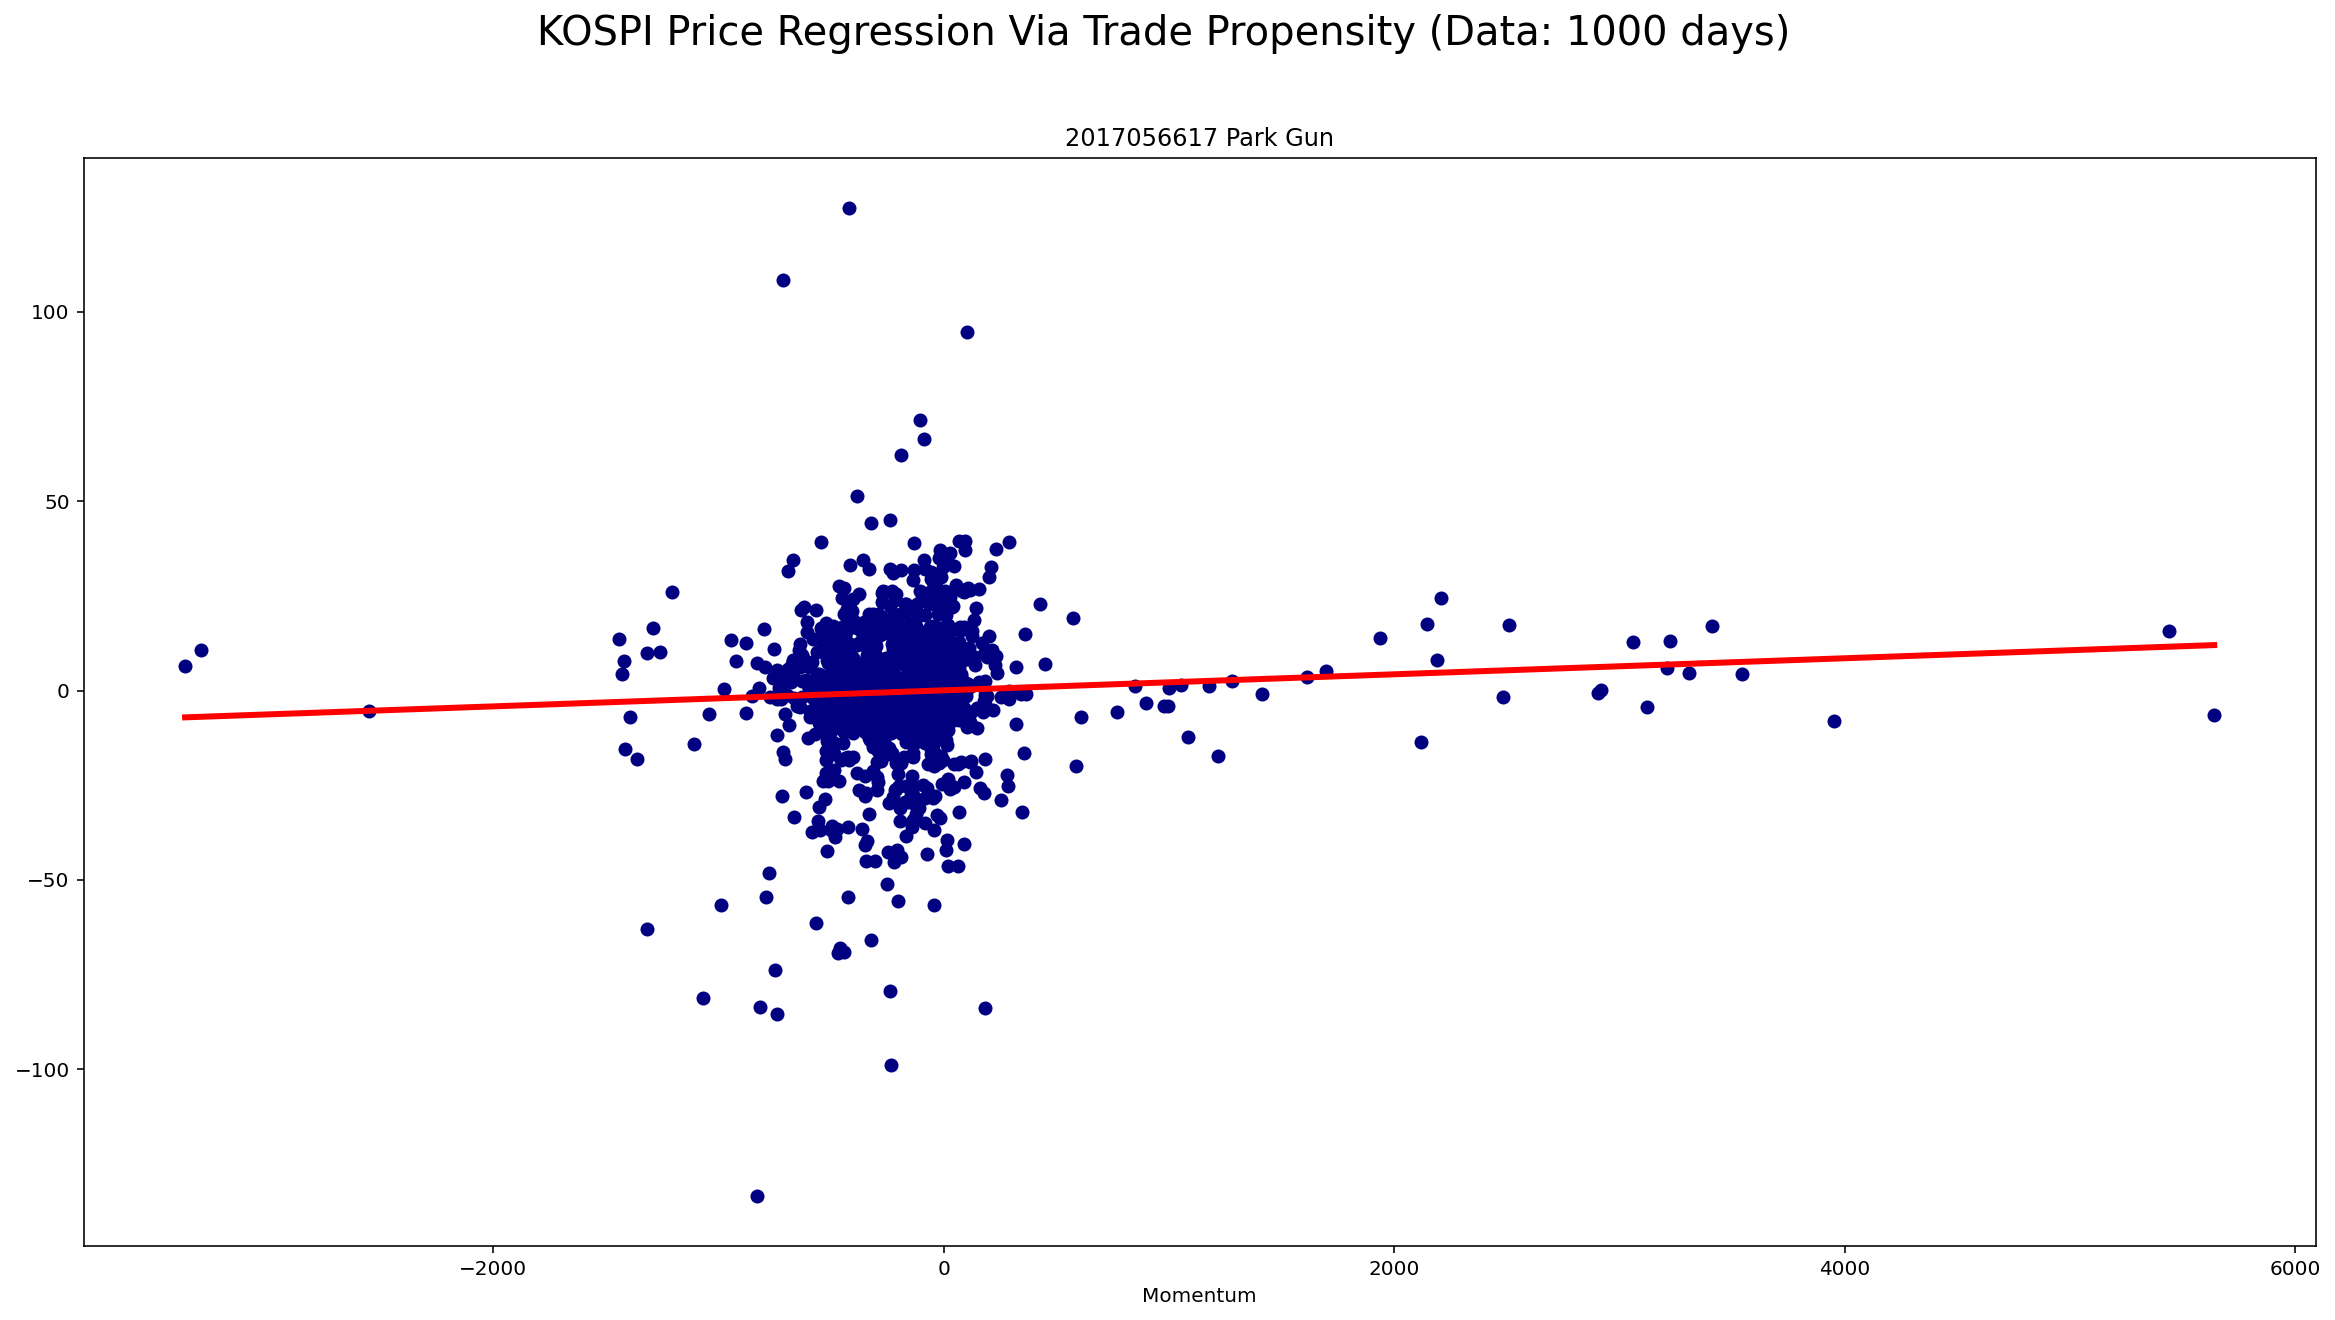

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

datanum = len(table["sum"])
print("전체 매매동향과 전일대비의 상관관계:")

print(np.corrcoef(table["sum"],table["전일대비 (원)"]))
print("")
print("개인 매매동향과 전일대비의 상관관계:")
print(np.corrcoef(table["개인투자자 (억원)"],table["전일대비 (원)"]))
print("")
print("외국인 매매동향과 전일대비의 상관관계:")
print(np.corrcoef(table["외국인 (억원)"],table["전일대비 (원)"]))
print("")
print("기관 매매동향과 전일대비의 상관관계:")
print(np.corrcoef(table["기관 (억원)"],table["전일대비 (원)"]))
print("")
plt.figure(figsize=(20,10))


x = table["sum"]
x = np.array(x).reshape(-1,1)

y = table["전일대비 (원)"]

x_train,x_test,y_trian,y_test = train_test_split(x,y,test_size = 0.2, random_state = 13)

reg = LinearRegression()
reg.fit(x_train,y_trian)

y_train_predict = reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_trian,y_train_predict)))
print("---------------------------------------------------")
print("Quadratic Square Root Value Of Error: "+ str(rmse))
print("---------------------------------------------------")

prediction_space = np.linspace(min(x),max(x)).reshape(-1,1)
plt.scatter(x,y,color = "navy")
plt.plot(prediction_space,reg.predict(prediction_space),color = "red",linewidth = 3)
plt.suptitle("KOSPI Price Regression Via Trade Propensity (Data: "+str(datanum)+" days)",fontsize=20)
plt.title("2017056617 Park Gun")
plt.xlabel("Momentum")


#for i in range(len(table["sum"])):
  #plt.scatter(float(table["sum"][i]),float(table["전일대비 (원)"][i]))
plt.show()

# 과거 데이터 기반으로 생산한 회귀 함수 이용
## 미래 코스피 가격 예측하기

In [0]:
def execute():
  print("\n단위: /억원")
  ForeignFloatDataP = int(input("예상 외국인 투자자 매수+/매도량-: \n"))
  IndFloatDataP = int(input("예상 개인 매수+/매도량-: \n"))
  InsFloatDataP = int(input("예상 기관 매수+/매도량-: \n"))
  nsum = ForeignFloatDataP+IndFloatDataP+InsFloatDataP
  x = nsum
  x = np.array(x).reshape(-1,1)
  y = reg.predict(x)
  print("KOSPI 예상 등락율: "+str(y)+"%")
  execute()
execute()



단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-5000
예상 개인 매수+/매도량-: 
8000
예상 기관 매수+/매도량-: 
-2600


KOSPI 예상 등락율: [0.90283826]%

단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-1
예상 개인 매수+/매도량-: 
50
예상 기관 매수+/매도량-: 
-2


KOSPI 예상 등락율: [0.15500061]%

단위: /억원
예상 외국인 투자자 매수+/매도량-: 
5000
예상 개인 매수+/매도량-: 
8000
예상 기관 매수+/매도량-: 
-9000


KOSPI 예상 등락율: [8.52951125]%

단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-5000
예상 개인 매수+/매도량-: 
-8000
예상 기관 매수+/매도량-: 
9000


KOSPI 예상 등락율: [-8.41865094]%

단위: /억원
